<a href="https://colab.research.google.com/github/yeseul515/Kimyeseul/blob/Project/Lending_Club_%EC%86%90%EC%8B%A4_%EB%B0%A9%EC%A7%80_%EB%B0%8F_%EC%9D%B4%EC%9D%B5_%EC%B0%BD%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석에 영향을 미치지 않는 불필요한 컬럼 제거



In [4]:
import pandas as pd

data = pd.read_csv('/content/lending_club_loan_two (2).csv')

In [5]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [6]:
COL_DEL = ['grade','emp_title','title','earliest_cr_line','address']
COL_NUM = ['loan_amnt','term','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
COL_CAT = ['sub_grade','home_ownership','verification_status','DIRECT_PAY','INDIVIDUAL','JOINT']
COL_Y = ['loan_status']

In [7]:
data = data.drop(COL_DEL, axis=1)

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data.to_csv('/content/lending_club.csv', index=False)

# EDA

## 1. 결측치 확인

In [10]:
data = pd.read_csv('/content/lending_club.csv')
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,...,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B4,2 years,RENT,40000.0,Source Verified,Oct-2015,...,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,C1,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,...,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,B1,10+ years,RENT,56500.0,Verified,Oct-2013,...,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,21000.0,60 months,15.31,503.02,C2,10+ years,MORTGAGE,64000.0,Verified,Aug-2012,...,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0


In [11]:
#결측치 확인하기
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

## 2. 종속 변수 인코딩

### ① loan_status 변수 label mapping

In [12]:
loan_status_mapping = {'Fully Paid':1, 'Charged Off':0}
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

### ② loan_status 0과 1의 비율 확인

In [13]:
ratio_data = data['loan_status'].value_counts(normalize=True).reset_index()
ratio_data.columns = ['loan_status', 'ratio']

In [14]:
print(ratio_data)

   loan_status     ratio
0            1  0.803871
1            0  0.196129


## 3. 수치형 변수 결측치 처리

### ① revol_util

→ 해당 칼럼의 결측치는 276개로 전체 데이터의 약 0.07%이기 때문에 제거하기로 결정

In [15]:
data.dropna(subset=['revol_util'], inplace=True)
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [16]:
#revol_util 결측치 제거
#subset을 설정하지 않으면 전체 data의 모든 결측치를 제거함
data.dropna(subset=['revol_util'], inplace=True)
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18290
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37205
pub_rec_bankruptcies        0
dtype: int64

### ② pub_rec_bankruptcies
→ 해당 칼럼의 결측치는 535개로 전체 데이터의 약 0.13%이기 때문에 제거하기로 결정

In [17]:
#pub_rec_bankruptcies 결측치 제거
#subset을 설정하지 않으면 전체 data의 모든 결측치를 제거함
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18290
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37205
pub_rec_bankruptcies        0
dtype: int64

### ③ mort_acc

→ 'total_acc' 컬럼을 기반으로 각 'total_acc' 그룹의 'mort_acc' 평균값을 사용하여 결측치를 대체

In [18]:
#mort_acc 결측치 대체

#tota_acc에 대한 mort_acc의 평균값 구하기
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc
print(total_acc_avg.head())

total_acc
2.0    0.000000
3.0    0.052326
4.0    0.066743
5.0    0.102108
6.0    0.151123
Name: mort_acc, dtype: float64


<ipython-input-18-1c7477a93134>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [19]:
import numpy as np

def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18290
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
dtype: int64

In [20]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18290
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
dtype: int64

## 4. 범주형 변수 인코딩

### ① sub_grade
- sub_grade A1 ~ G5까지 인코딩(A1이 가장 높은 등급이므로 가장 높은 값을 갖도록 인코딩함)

In [21]:
grades = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
          'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

# 각 등급에 부여할 값 생성
values = [34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
          16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# 등급과 값의 매핑을 딕셔너리로 생성
grade_to_value = dict(zip(grades, values))

# '등급' 컬럼을 매핑하여 새로운 '값' 컬럼 생성
data['sub_grade'] = data['sub_grade'].map(grade_to_value)

# 결과 출력
print(data)

        loan_amnt        term  int_rate  installment  sub_grade emp_length  \
0         10000.0   36 months     11.44       329.48         26  10+ years   
1          8000.0   36 months     11.99       265.68         25    4 years   
2         15600.0   36 months     10.49       506.97         27   < 1 year   
3          7200.0   36 months      6.49       220.65         33    6 years   
4         24375.0   60 months     17.27       609.33         20    9 years   
...           ...         ...       ...          ...        ...        ...   
396025    10000.0   60 months     10.99       217.38         26    2 years   
396026    21000.0   36 months     12.29       700.42         24    5 years   
396027     5000.0   36 months      9.99       161.32         29  10+ years   
396028    21000.0   60 months     15.31       503.02         23  10+ years   
396029     2000.0   36 months     13.61        67.98         23  10+ years   

       home_ownership  annual_inc verification_status   issue_d

### ② emp_length
- 근속 연수에 따른 loan_status의 비율을 확인했을 때, 비율에 변화가 X (8:2의 비율임)

- 상관관계가 낮은 변수라고 판단하여 칼럼 삭제

In [22]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1    0.815827
0    0.184173
Name: loan_status, dtype: float64
4 years years in this position:
1    0.807848
0    0.192152
Name: loan_status, dtype: float64
< 1 year years in this position:
1    0.793055
0    0.206945
Name: loan_status, dtype: float64
6 years years in this position:
1    0.810652
0    0.189348
Name: loan_status, dtype: float64
9 years years in this position:
1    0.799477
0    0.200523
Name: loan_status, dtype: float64
2 years years in this position:
1    0.806665
0    0.193335
Name: loan_status, dtype: float64
3 years years in this position:
1    0.804545
0    0.195455
Name: loan_status, dtype: float64
8 years years in this position:
1    0.800324
0    0.199676
Name: loan_status, dtype: float64
7 years years in this position:
1    0.805177
0    0.194823
Name: loan_status, dtype: float64
5 years years in this position:
1    0.807749
0    0.192251
Name: loan_status, dtype: float64
1 year years in this position:
1    0.800853
0    0.19914

In [23]:
data.drop('emp_length', axis=1, inplace=True)

### ③ home_ownership
- 주택을 보유하고 있는 경우에만 가중치 부여

In [24]:
from sklearn.preprocessing import LabelEncoder

data['home_ownership'].unique()

label_mapping = {'OWN':1, 'RENT':0, 'MORTGAGE':0, 'OTHER':0, 'ANY':0, 'NONE':0}
data['home_ownership'] = data['home_ownership'].map(label_mapping)
print(data['home_ownership'])

0         0
1         0
2         0
3         0
4         0
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: home_ownership, Length: 395219, dtype: int64


### ④ verification_status

- 'Not Verified': 0 / 'Source Verified': 1 / 'Verified’: 2

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['verification_status'])
data['verification_status'] = encoder.transform(data['verification_status'])

### ⑤ purpose
- 목적의 종류와 상관없이 종속 변수의 비율이 8:2로 동일함.
- 상관관계가 없는 변수라고 판단하고 칼럼 삭제를 결정함.

In [26]:
df = pd.DataFrame(data)

# 'purpose'와 'loan_status'에 대한 피벗 테이블 생성
pivot_table = df.pivot_table(index='purpose', columns='loan_status', aggfunc='size', fill_value=0).reset_index()

# 결과 확인
pivot_table['ratio'] = pivot_table[1] / (pivot_table[0] + pivot_table[1])
pivot_table

loan_status,purpose,0,1,ratio
0,car,628,4042,0.865525
1,credit_card,13864,69059,0.832809
2,debt_consolidation,48573,185596,0.792573
3,educational,40,206,0.837398
4,home_improvement,4076,19885,0.829890
5,house,434,1763,0.802458
6,major_purchase,1442,7314,0.835313
7,medical,907,3268,0.782754
8,moving,667,2175,0.765306
9,other,4471,16588,0.787692


In [27]:
data.drop('purpose', axis=1, inplace=True)

### ⑥ issue_d
- 날짜 데이터로, 분석에 사용하지 않을 컬럼이기 때문에 삭제함

In [28]:
data.drop('issue_d', axis=1, inplace=True)

### ⑦ initial_list_status

- purpose와 동일한 이유로 칼럼 삭제 결정

In [29]:
df = pd.DataFrame(data)

# 'initial_list_status'와 'loan_status'에 대한 피벗 테이블 생성
pivot_table = df.pivot_table(index='initial_list_status', columns='loan_status', aggfunc='size', fill_value=0)

# 결과 확인
pivot_table['ratio'] = pivot_table[1] / (pivot_table[0] + pivot_table[1])
pivot_table

data.drop('initial_list_status', axis=1, inplace=True)

### ⑧ application_type

- application_type은 가중치 주기에는 기준이 모호함.
- get_dummies로 원핫인코딩 진행

In [30]:
at_encoding = pd.get_dummies(data['application_type'])

data = pd.concat([data,at_encoding], axis=1)

data.drop('application_type', axis=1, inplace=True)

### ⑨ terms

- 36 months, 60 months을 36, 60으로 변환

In [31]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else x)

# 결과 출력
print(data)

        loan_amnt  term  int_rate  installment  sub_grade  home_ownership  \
0         10000.0    36     11.44       329.48         26               0   
1          8000.0    36     11.99       265.68         25               0   
2         15600.0    36     10.49       506.97         27               0   
3          7200.0    36      6.49       220.65         33               0   
4         24375.0    60     17.27       609.33         20               0   
...           ...   ...       ...          ...        ...             ...   
396025    10000.0    60     10.99       217.38         26               0   
396026    21000.0    36     12.29       700.42         24               0   
396027     5000.0    36      9.99       161.32         29               0   
396028    21000.0    60     15.31       503.02         23               0   
396029     2000.0    36     13.61        67.98         23               0   

        annual_inc  verification_status  loan_status    dti  open_acc  \
0 

# 이상치 처리

## 1. 이상치 파악하기

### ① loan_amnt

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d85646050>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d85646590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d85645db0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d85646ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d85646d70>],
 'means': []}

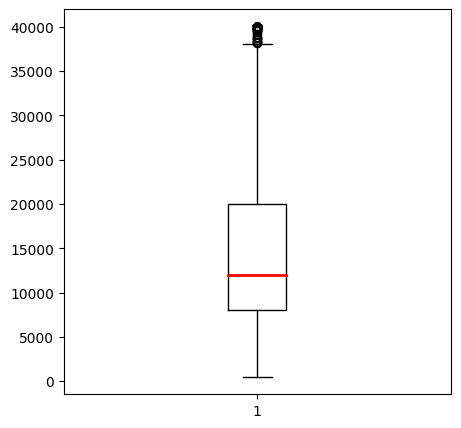

In [32]:
Q1 = data['loan_amnt'].quantile(q=0.25)
Q3 = data['loan_amnt'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['loan_amnt'], medianprops=medianprops)

### ② int_rate

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d8b9f6110>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d8b9f7a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d8b9f7370>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d8b9f7f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d8bad4250>],
 'means': []}

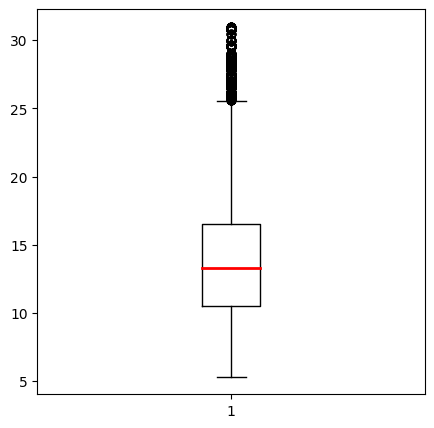

In [33]:
Q1 = data['int_rate'].quantile(q=0.25)
Q3 = data['int_rate'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['int_rate'], medianprops=medianprops)

### ③ installment

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d8bb0a230>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d8bb0a770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d8bb08f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d8bb0acb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d8bb0af50>],
 'means': []}

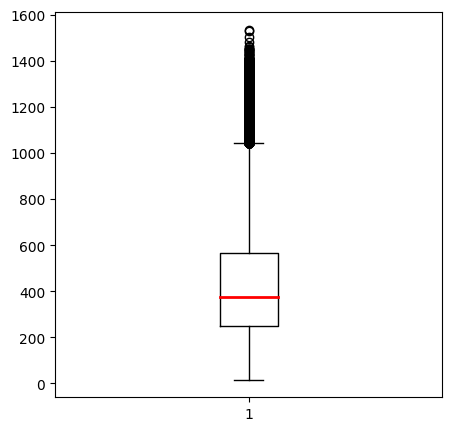

In [34]:
Q1 = data['installment'].quantile(q=0.25)
Q3 = data['installment'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['installment'], medianprops=medianprops)

### ④ annual_inc

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d8bb9aec0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d8bb98070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d8bb9ac20>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d8bb9b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d8bb9bac0>],
 'means': []}

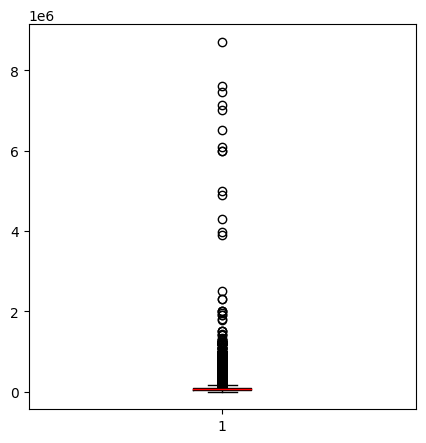

In [35]:
import numpy as np

Q1 = data['annual_inc'].quantile(q=0.25)
Q3 = data['annual_inc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

data.loc[(data['annual_inc']>upper) | (data['annual_inc']<lower)]

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['annual_inc'], medianprops=medianprops)

### ⑤ dti

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84934fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d84935510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d84934d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d84935a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84935cf0>],
 'means': []}

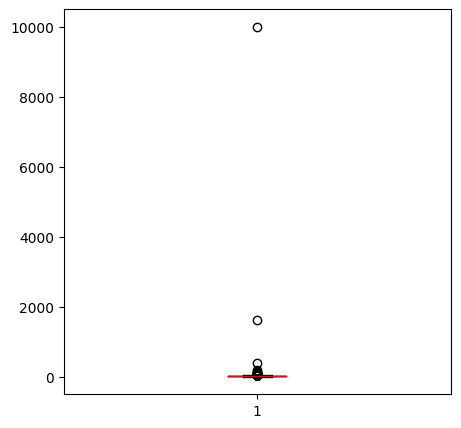

In [36]:
Q1 = data['dti'].quantile(q=0.25)
Q3 = data['dti'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

data.loc[(data['dti']>upper) | (data['dti']<lower)]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['dti'], medianprops=medianprops)

### ⑥ open_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d848fbd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d848cc280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d848fba60>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d848cc7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d848cca60>],
 'means': []}

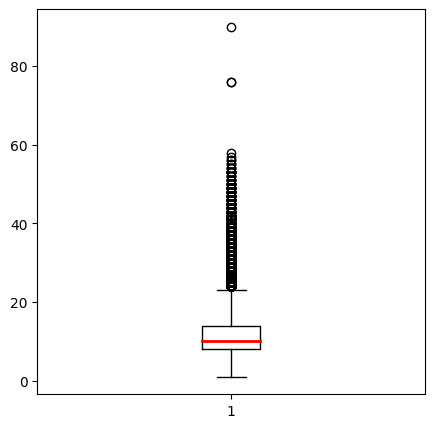

In [37]:
Q1 = data['open_acc'].quantile(q=0.25)
Q3 = data['open_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['open_acc'], medianprops=medianprops)

### ⑦ pub_rec

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84940dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d849426e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d84942020>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d84942c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84942ec0>],
 'means': []}

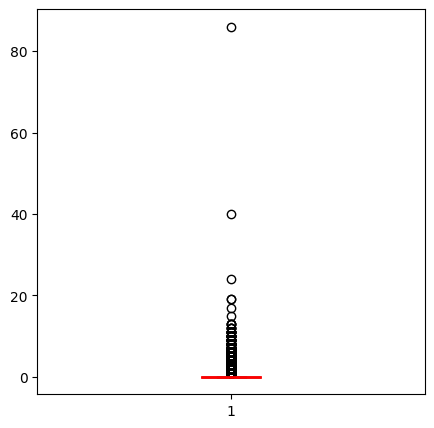

In [38]:
Q1 = data['pub_rec'].quantile(q=0.25)
Q3 = data['pub_rec'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['pub_rec'], medianprops=medianprops)

### ⑧ revol_bal

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d85198910>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d85198e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d85198670>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d851993c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d85199660>],
 'means': []}

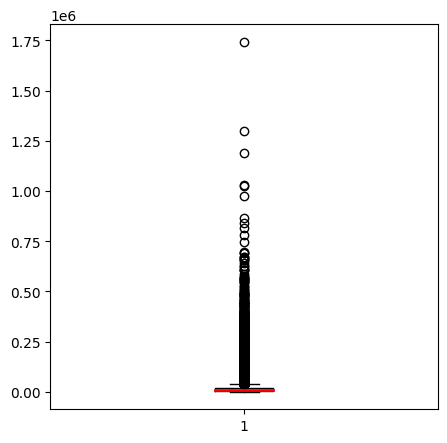

In [39]:
Q1 = data['revol_bal'].quantile(q=0.25)
Q3 = data['revol_bal'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_bal'], medianprops=medianprops)

### ⑨ revol_util

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d851248e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d85124d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d85124640>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d85125240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d851254e0>],
 'means': []}

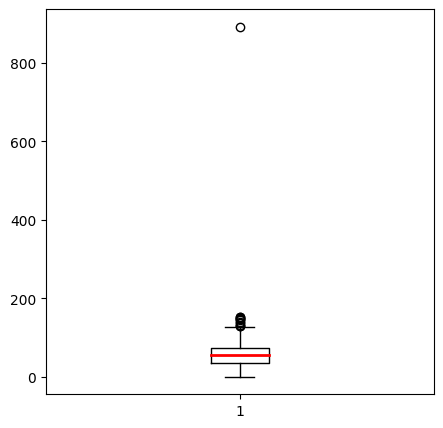

In [40]:
Q1 = data['revol_util'].quantile(q=0.25)
Q3 = data['revol_util'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_util'], medianprops=medianprops)

### ⑩ total_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d850ceef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d850cf430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d850ce9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d850cf970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d850cfc10>],
 'means': []}

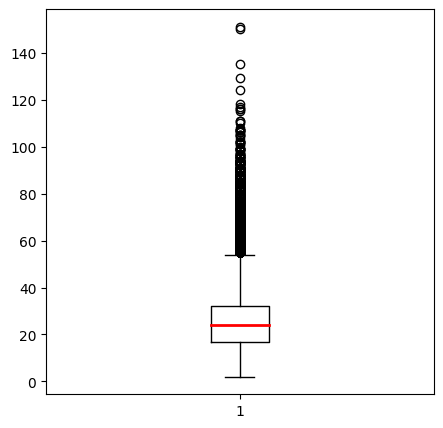

In [41]:
Q1 = data['total_acc'].quantile(q=0.25)
Q3 = data['total_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

data.loc[(data['total_acc']>upper) | (data['total_acc']<lower)]

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['total_acc'], medianprops=medianprops)

### ⑪ mort_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d85447130>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d85447550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d85446e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d85447a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d85447d30>],
 'means': []}

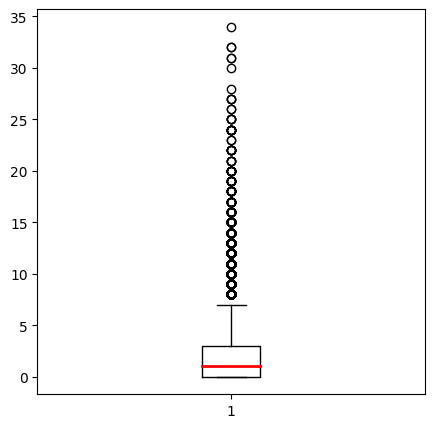

In [42]:
Q1 = data['mort_acc'].quantile(q=0.25)
Q3 = data['mort_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

data.loc[(data['mort_acc']>upper) | (data['mort_acc']<lower)]

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['mort_acc'], medianprops=medianprops)

### ⑫ pub_rec_bank

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d853db340>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d853db880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d853db0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d853dbdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d853a40a0>],
 'means': []}

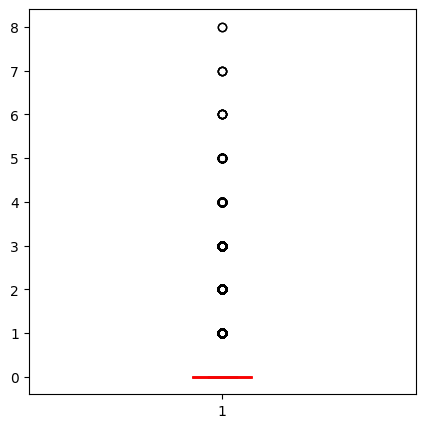

In [43]:
Q1 = data['pub_rec_bankruptcies'].quantile(q=0.25)
Q3 = data['pub_rec_bankruptcies'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

data.loc[(data['pub_rec_bankruptcies']>upper) | (data['pub_rec_bankruptcies']<lower)]

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['pub_rec_bankruptcies'], medianprops=medianprops)

## 2. 이상치 제거하기

### ① dti → 맨 위에 두 개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d6d158550>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d6d158a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d6d1582b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d6d158fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d6d159270>],
 'means': []}

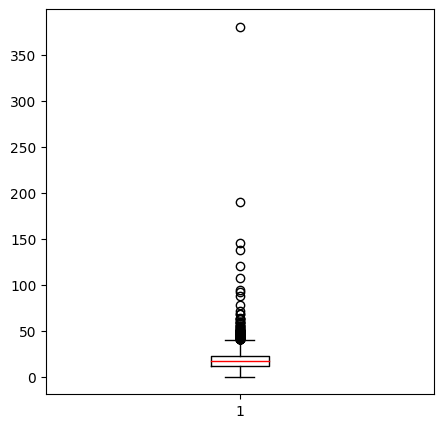

In [44]:
Q1 = data['dti'].quantile(q=0.25)
Q3 = data['dti'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outliers = data.loc[(data['dti']>upper) | (data['dti']<lower), 'dti'].sort_values(ascending=False).head(2).index

data = data.drop(outliers).reset_index(drop=True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['dti'], medianprops=medianprops)

### ② open_acc → 맨 위에 두 개 제거

107383     1.0
74612      1.0
192947     1.0
192953     1.0
314541     1.0
          ... 
127201    56.0
133820    56.0
53225     57.0
72618     58.0
272508    76.0
Name: open_acc, Length: 395215, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84ea8130>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d84ea8670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d6d107e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d6d1805e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84ea89d0>],
 'means': []}

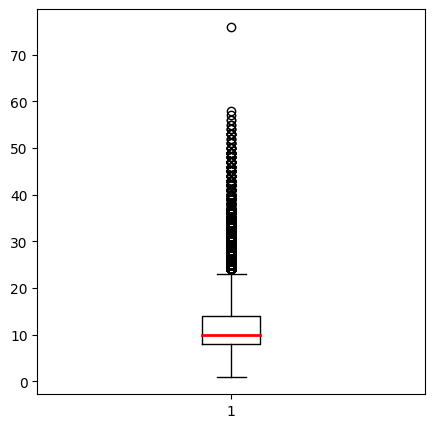

In [45]:
Q1 = data['open_acc'].quantile(q=0.25)
Q3 = data['open_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

#이상치 값 정의
outliers = data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)]

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='open_acc', ascending=False).head(2)
top_outliers['open_acc']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

#결과 출력
print(data['open_acc'].sort_values())

#다시 시각화하고 확인
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['open_acc'], medianprops=medianprops)

### ③ pub_rec  → 맨 위에 두 개 제거

0          0.0
253201     0.0
253200     0.0
253199     0.0
253198     0.0
          ... 
355477    15.0
150400    17.0
58094     19.0
111973    19.0
252254    24.0
Name: pub_rec, Length: 395213, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84f53d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d84f242e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d84f53ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d84f24820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84f24ac0>],
 'means': []}

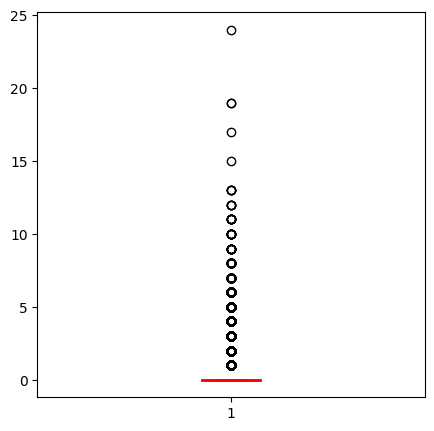

In [46]:
Q1 = data['pub_rec'].quantile(q=0.25)
Q3 = data['pub_rec'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

#이상치 값 정의
outliers = data.loc[(data['pub_rec']>upper) | (data['pub_rec']<lower)]

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='pub_rec', ascending=False).head(2)
top_outliers['pub_rec']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

#결과 출력
print(data['pub_rec'].sort_values())

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['pub_rec'], medianprops=medianprops)

### ④ revol_bal → 맨 위에 하나 제거

353404          0.0
56935           0.0
15995           0.0
386051          0.0
332957          0.0
            ...    
308212     975800.0
254776    1023940.0
119215    1030826.0
53470     1190046.0
243642    1298783.0
Name: revol_bal, Length: 395212, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84ee2530>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d84ee2a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d84ee09d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d84ee2fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84ee3250>],
 'means': []}

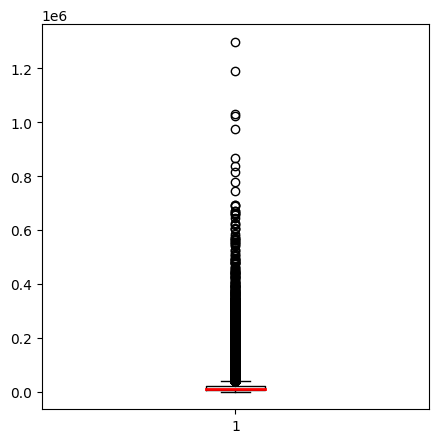

In [47]:
#이상치 값 정의
outliers = data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)]

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='revol_bal', ascending=False).head(1)
top_outliers['revol_bal']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

#결과 출력
print(data['revol_bal'].sort_values())

#다시 시각화하고 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_bal'], medianprops=medianprops)

### ⑤ revol_util → 맨 위에 1개 없애기

108541      0.0
377299      0.0
14847       0.0
89194       0.0
310211      0.0
          ...  
164776    146.1
349604    148.0
65563     150.7
82451     152.5
328358    153.0
Name: revol_util, Length: 395211, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7d5d84b562c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d5d84b56800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d5d84b56020>],
 'medians': [<matplotlib.lines.Line2D at 0x7d5d84b56d40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d5d84b56fe0>],
 'means': []}

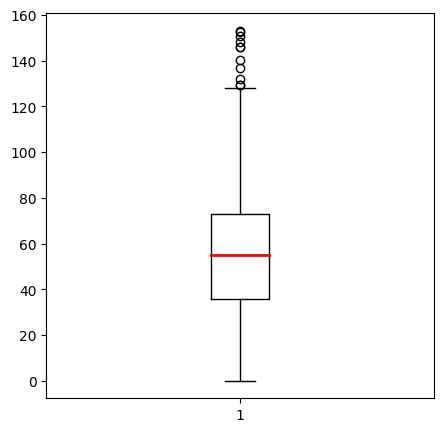

In [48]:
#이상치 값 정의
outliers = data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)]

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='revol_util', ascending=False).head(1)
top_outliers['revol_util']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

#결과 출력
print(data['revol_util'].sort_values())

#다시 시각화하고 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_util'], medianprops=medianprops)

# 상관관계 분석

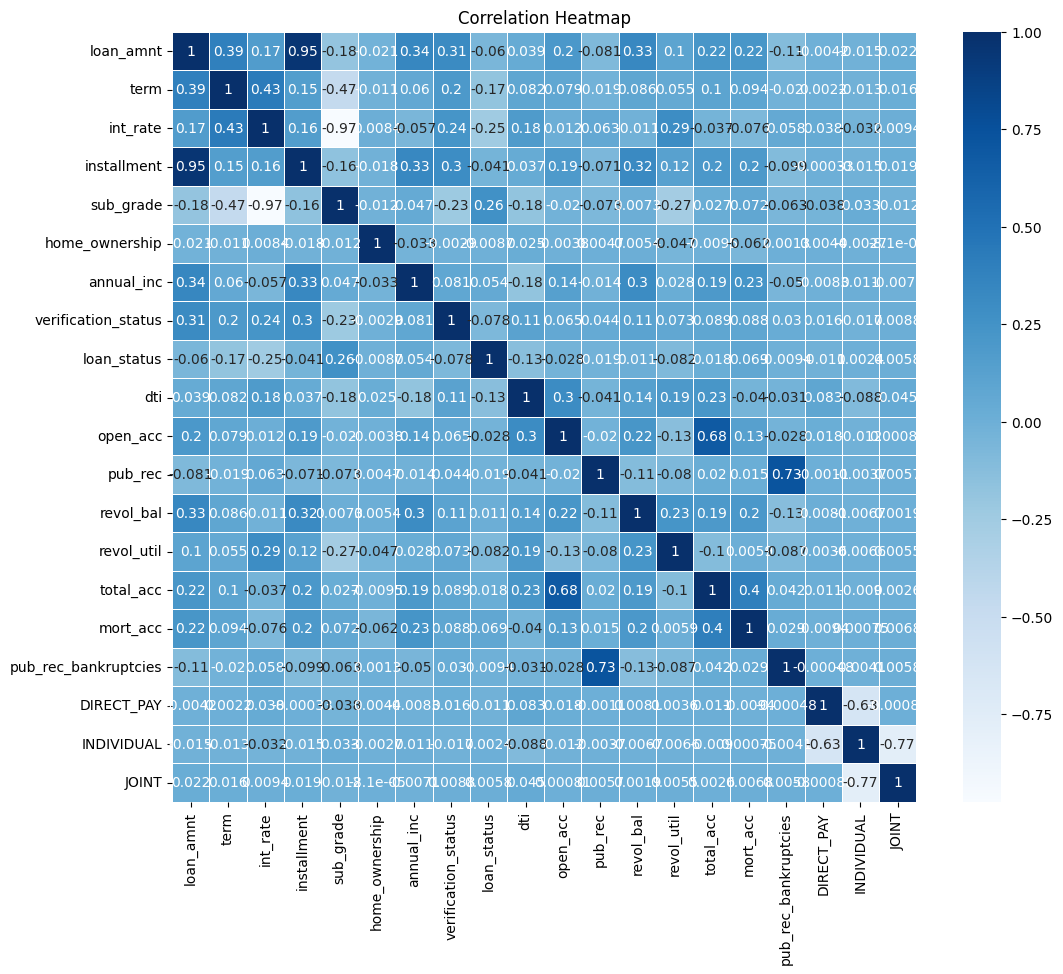

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관계수 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 모델링

## 1. 데이터 분리

In [50]:
test = data.drop('loan_status', axis=1)
s = int(len(test) * 0.8)

X_train = test.iloc[:s]
X_test = test.iloc[s:]

y_train = data['loan_status'].iloc[:s]
y_test = data['loan_status'].iloc[s:]

In [51]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train[COL_NUM+COL_CAT],
							                         y_train.values.ravel(),
								                       test_size=0.3,
							                         stratify=y_train.values.ravel())

## 2. 수치형 변수 스케일링

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM] = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM] = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

<ipython-input-52-894467aa0314>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])


## 3. 모델 적용

### ① XGBoost

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

modelXGB = XGBClassifier()
modelXGB.fit(X_tr, y_tr)

#예측 데이터 정의하기
y_val_pred = modelXGB.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

#정밀도 계산
precision = precision_score(y_val, y_val_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

f1 = f1_score(y_val, y_val_pred, average='macro')
print('f1:', f1)

Confusion Matrix:
 [[ 1727 16857]
 [ 1489 74778]]
--------------------------------------------------
Accuracy: 0.8065808478561112
Precision: 0.6765221964738429
Recall: 0.5367029427836336
f1: 0.5245871237251875


### ② Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

modelRF = RandomForestClassifier(random_state=123)
modelRF.fit(X_tr, y_tr)

y_val_pred = modelRF.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

#정밀도 계산
precision = precision_score(y_val, y_val_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

f1 = f1_score(y_val, y_val_pred, average='macro')
print('f1:', f1)


Confusion Matrix:
 [[ 1687 16897]
 [ 1525 74742]]
--------------------------------------------------
Accuracy: 0.805779591148222
Precision: 0.6704156862224433
Recall: 0.5353907352531654
f1: 0.5225414474965442


### ③ Logistic Regressor

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=123)
model.fit(X_tr, y_tr)

y_val_pred = model.predict(X_val)

# 성능 평가
# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

#정밀도 계산
precision = precision_score(y_val, y_val_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

f1 = f1_score(y_val, y_val_pred, average='macro')
print('f1:', f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[ 1404 17180]
 [ 1339 74928]]
--------------------------------------------------
Accuracy: 0.8047569345605212
Precision: 0.6626640846300973
Recall: 0.5289960588929705
f1: 0.5108387254025059


### ④ KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_tr, y_tr)

y_val_pred=modelKNN.predict(X_val)
print(classification_report(y_val, y_val_pred))

confusion = confusion_matrix(y_val,y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)
#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

#정밀도 계산
precision = precision_score(y_val, y_val_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

f1 = f1_score(y_val, y_val_pred, average='macro')
print('f1:', f1)

              precision    recall  f1-score   support

           0       0.36      0.17      0.23     18584
           1       0.82      0.93      0.87     76267

    accuracy                           0.78     94851
   macro avg       0.59      0.55      0.55     94851
weighted avg       0.73      0.78      0.74     94851

Confusion Matrix:
 [[ 3075 15509]
 [ 5479 70788]]
--------------------------------------------------
Accuracy: 0.7787266344055414
Precision: 0.589882192168051
Recall: 0.5468125975382913
f1: 0.5487567125929248


### ⑤ Naive Bayes

In [57]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# BernoulliNB 모델 생성
model_BernoulliNB = BernoulliNB()

# 학습 데이터에 모델 훈련
model_BernoulliNB.fit(X_tr, y_tr)

# 검증 데이터 예측
y_val_pred = model_BernoulliNB.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

# 정밀도 계산
precision = precision_score(y_val, y_val_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

# F1 점수 계산
f1 = f1_score(y_val, y_val_pred, average='macro')
print('F1 Score:', f1)

Confusion Matrix:
 [[ 3360 15224]
 [ 4583 71684]]
--------------------------------------------------
Accuracy: 0.7911777419320829
Precision: 0.623920113809002
Recall: 0.5603545840927551
F1 Score: 0.5659708915116587


## 4. 오버샘플링

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# 클래스 별로 샘플 수 계산

#2 = 체납
minority_class = data[data['loan_status'] == 0]
#1 = 완납
majority_class = data[data['loan_status'] == 1]

print("Minority class samples:", len(minority_class))
print("Majority class samples:", len(majority_class))


# 적절한 비율로 오버샘플링 수행
minority_class_oversampled = resample(minority_class,
                                      replace=True,
                                      n_samples=len(majority_class),
                                      random_state=42)

# 오버샘플링된 데이터를 기존 데이터와 합치기
data_oversampled = pd.concat([majority_class, minority_class_oversampled])

# train_test_split을 사용하여 데이터 분할
X = data_oversampled.drop('loan_status', axis=1)  # Features
y = data_oversampled['loan_status']  # Target variable

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_tr.shape)
print(y_tr.shape)

Minority class samples: 77519
Majority class samples: 317692
(508307, 19)
(508307,)


## 5. 최종 모델 선정

In [59]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=123)
modelRF.fit(X_tr, y_tr)

y_val_predRF = modelRF.predict(X_val)

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_predRF)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_predRF)
print('Accuracy:', accuracy)

#정밀도 계산
precision = precision_score(y_val, y_val_predRF, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_val, y_val_predRF, average='macro')
print('Recall:', recall)

Confusion Matrix:
 [[61936  1722]
 [ 5167 58252]]
--------------------------------------------------
Accuracy: 0.9457887737356091
Precision: 0.9471432648359008
Recall: 0.945737595530139


# 모델을 기반으로 1인 평균 손실, 이익, 기회비용 구하기

## 1. 1인 평균 손실

In [60]:
#Charged_off인 사람들의 amnt 꺼내기
co_people = data[data['loan_status']==0]['loan_amnt']
print(co_people)
print('-'*80)

#선별된 사람들의 평균 구하기
co_people_mean = co_people.mean()
print(co_people_mean)

4         24375.0
25         6000.0
26         8400.0
36         3250.0
41        28000.0
           ...   
395187    10000.0
395188    15000.0
395189    17500.0
395198    13000.0
395200     9575.0
Name: loan_amnt, Length: 77519, dtype: float64
--------------------------------------------------------------------------------
15132.90741624634


## 2. 추정이익, 추정손실, 전체 이익 구하기

In [63]:
true_positives = confusion[1, 1]
false_negatives = confusion[1, 0]
false_positives = confusion[0, 1]

co_people_mean = co_people.mean()
gain = true_positives * co_people_mean
loss = false_negatives * co_people_mean
total_gain = gain - loss
opportunity_cost = false_positives * co_people_mean

print('True Positives:', true_positives)
print("False Negatives:", false_negatives)
print('False Positives: ', false_positives)
print('Charged_off 클래스의 대출 평균 금액:', co_people_mean)
print('추정 이익:', gain)
print('추정 손실:', loss)
print('추정 전체 이익:', total_gain)
print('추정 기회 비용: ', opportunity_cost)

True Positives: 58252
False Negatives: 5167
False Positives:  1722
Charged_off 클래스의 대출 평균 금액: 15132.90741624634
추정 이익: 881522122.8111818
추정 손실: 78191732.61974484
추정 전체 이익: 803330390.191437
추정 기회 비용:  26058866.570776198
